In [11]:
def plot_time_prop(data,t0,t1,t2,tr='UnTrained'):
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(10,7))
    plt.plot(data[t0],label=f'Max_{t0}={data[t0].max()}')
    plt.plot(data[t1],label=f'Max_{t1}={data[t1].max()}')
    plt.plot(data[t2],label=f'Max_{t2}={data[t2].max()}')
    plt.ylabel('Concentration')
    plt.xlabel('N_x')
    plt.title(tr+'Model Predictions')
    plt.legend()
    plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from upwind import upwind_data
from CD2 import CD2_data
fine_res,grid_length =2**6,2*np.pi
x_fine = np.arange(fine_res)*grid_length/fine_res
CFL,u0,tend=0.08,-0.2,15.
dx=grid_length/len(x_fine)
dt=dx*CFL/abs(u0)
N_t=int(tend//dt)
time_steps=np.arange(N_t)
# print(x_fine.shape)
wave_init = np.sin(x_fine)


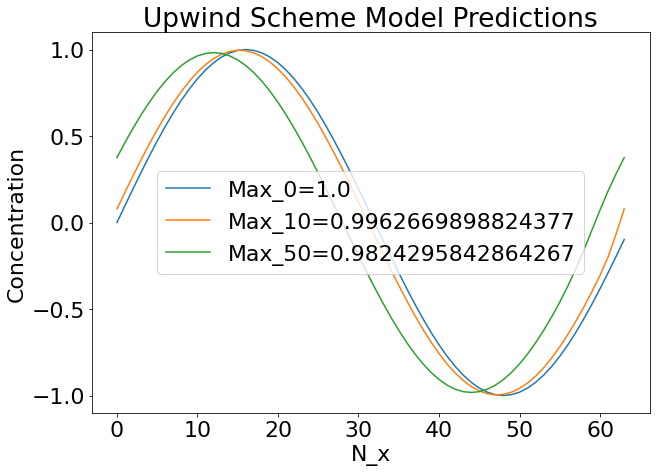

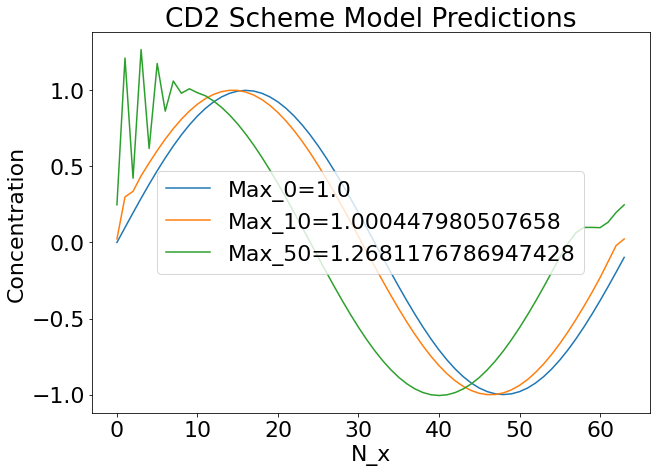

In [13]:

datu=upwind_data(linear=True,init=wave_init,c=u0,ntime=N_t,N_x=len(x_fine),delt=dt,delx=dx)
datc=CD2_data(linear=True,init=wave_init,c=u0,ntime=N_t,N_x=len(x_fine),delt=dt,delx=dx)

# plot_time_prop(dat,0,N_t//2,N_t-1,tr='Upwind Scheme ')
plot_time_prop(datu,0,10,50,tr='Upwind Scheme ')
plot_time_prop(datc,0,10,50,tr='CD2 Scheme ')


In [54]:
# x=1
# if (x>3):
#     print(x)
# else:
#     pass

In [55]:
'''Solution of linear advection equation
Periodic Boundary conditions
del-u/del-t = - c* del-u/del-x
 '''

def CD2_data(linear,init,c=None,ntime=N_t,N_x=len(x_fine),delt=dt,delx=dx):
    data_ls=[]
    u=init
    if linear == True: 
        for step in range(ntime):
            data_ls.append(u) # At t = 0 ,step = 0  At t = ntime-1 , step = ntime-1
            unew=u.copy() 
            for i in range(1,N_x-1):
                unew[i]=u[i] + delt*( -c*(u[i+1]-u[i-1])/delx )  ## B.D. model
            unew[0]=u[0] + delt*( -c*(u[1]-u[N_x-2]) )
            unew[N_x-1]=unew[0] 
            u=unew
    elif linear == False:
        pass
    data_sol=np.stack(data_ls)
    return data_sol


def upwind_data(linear,init,c=None,ntime=N_t,N_x=len(x_fine),delt=dt,delx=dx):
    data_ls=[]
    u=init
    if ((linear == True) and (c>0)): ## Apply B.D. with preiodic boundary conditions
        for step in range(ntime):
            data_ls.append(u) # At t = 0 ,step = 0  At t = ntime-1 , step = ntime-1
            unew=u.copy() 
            for i in range(1,N_x-1):
                unew[i]=u[i] + delt*( -c*(u[i]-u[i-1])/delx )  ## B.D. model
            unew[0]=u[0] + delt*( -c*(u[0]-u[N_x-2]) )
            unew[N_x-1]=unew[0] 
            u=unew

    elif ((linear == True) and (c<=0)): ## Apply F.D. with preiodic boundary conditions
        for step in range(ntime):
            data_ls.append(u) # At t = 0 ,step = 0  At t = ntime-1 , step = ntime-1
            unew=u.copy() 
            for i in range(1,N_x-1):
                unew[i]=u[i] + delt*( -c*(u[i+1]-u[i])/delx )  ## F.D. model
            unew[0]=u[0] + delt*( -c*(u[1]-u[0])/delx )
            unew[N_x-1]=unew[0] 
            u=unew
    else:
        print(c)
        for step in range(ntime):
            data_ls.append(u) # At t = 0 ,step = 0  At t = ntime-1 , step = ntime-1
            unew=u.copy()
            for i in range(1,N_x-1):
                if u[i]>0:
                    unew[i]=u[i] + delt*( -u[i]*(u[i]-u[i-1])/delx)
                else:
                    unew[i]=u[i] + delt*( -u[i]*(u[i+1]-u[i])/delx)
            if u[0]>0:
                unew[0]=u[0] + delt*( -u[0]*(u[0]-u[N_x-2])/delx)
            else:
                unew[0]=u[0] + delt*( -u[0]*(u[1]-u[0])/delx ) 
                
            unew[N_x-1]=unew[0]   
            u=unew
    data_sol=np.stack(data_ls)
    return data_sol


(32,)


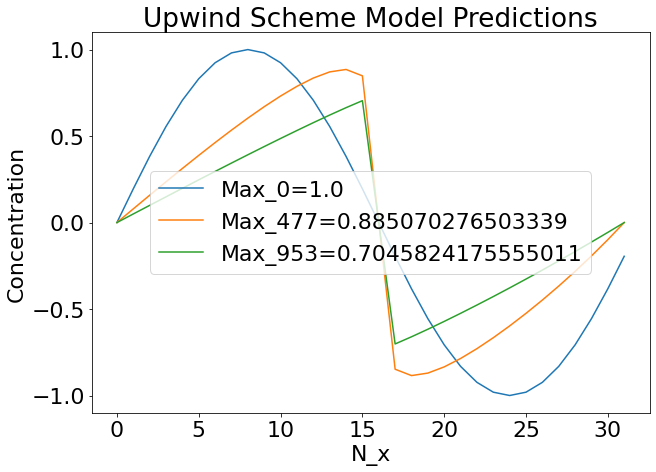

(64,)


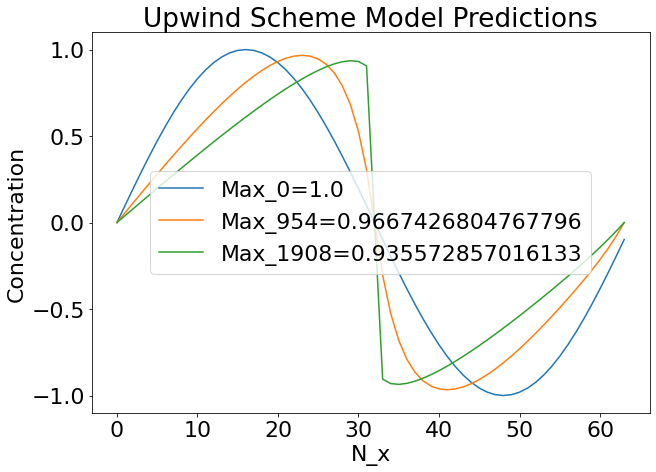

(128,)


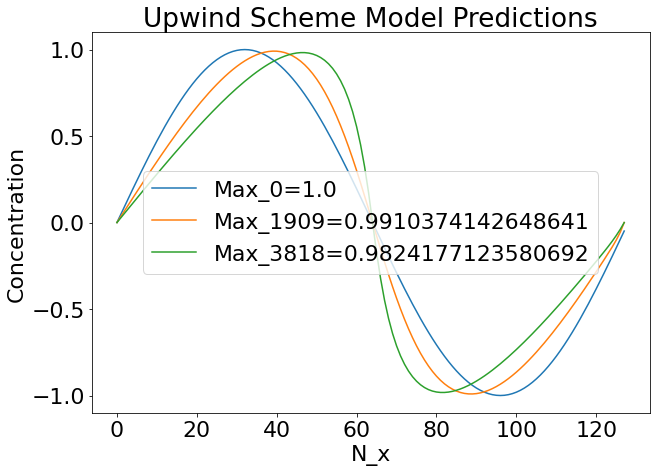

In [41]:
import numpy as np
import matplotlib.pyplot as plt

for order in range(5,8):
    fine_grid_resolution,grid_length =2**order,2*np.pi
    x_fine = np.arange(fine_grid_resolution)*grid_length/fine_grid_resolution
    CFL,u0,tend=0.08,1.,15.
    dx=grid_length/len(x_fine)
    dt=dx*CFL/u0
    N_t=int(tend//dt)
    time_steps=np.arange(N_t)
    print(x_fine.shape)
    datu=upwind_data(np.sin(x_fine),ntime=N_t,N_x=len(x_fine),delt=dt)
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(10,7))
    plot_time_prop(datu,0,N_t//2,N_t-1,tr='Upwind Scheme ')

In [18]:
x_fine

array([0.        , 0.19634954, 0.39269908, 0.58904862, 0.78539816,
       0.9817477 , 1.17809725, 1.37444679, 1.57079633, 1.76714587,
       1.96349541, 2.15984495, 2.35619449, 2.55254403, 2.74889357,
       2.94524311, 3.14159265, 3.33794219, 3.53429174, 3.73064128,
       3.92699082, 4.12334036, 4.3196899 , 4.51603944, 4.71238898,
       4.90873852, 5.10508806, 5.3014376 , 5.49778714, 5.69413668,
       5.89048623, 6.08683577])

In [12]:
# for i in range(1,len(x_fine)-1):
#     print(i)    

In [29]:
def upwind_data(init,ntime=N_t,N_x=len(x_fine),delt=dt):
    data_ls=[]
    u=init    
    for step in range(ntime):
        data_ls.append(u)
        unew=u.copy()
        for i in range(1,N_x-1):
            if u[i]>0:
                unew[i]=u[i] + delt*( -u[i]*(u[i]-u[i-1]) )
            else:
                unew[i]=u[i] + delt*( -u[i]*(u[i+1]-u[i]) )
        if u[0]>0:
            unew[0]=u[0] + delt*( -u[0]*(u[0]-u[N_x-2]) )
        else:
            unew[0]=u[0] + delt*( -u[0]*(u[1]-u[0]) ) 
        unew[N_x-1]=unew[0]   
        u=unew
    data_sol=np.stack(data_ls)
    return data_sol
def plot_time_prop(data,t0,t1,t2,tr='UnTrained'):
    plt.plot(data[t0],label=f'Max_{t0}={data[t0].max()}')
    plt.plot(data[t1],label=f'Max_{t1}={data[t1].max()}')
    plt.plot(data[t2],label=f'Max_{t2}={data[t2].max()}')
    plt.ylabel('Concentration')
    plt.xlabel('N_x')
    plt.title(tr+'Model Predictions')
    plt.legend()
    plt.show()


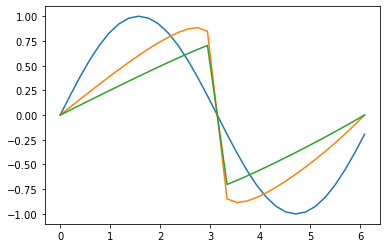

In [28]:
plt.plot(x_fine,du[0])
plt.plot(x_fine,du[N_t//2])
plt.plot(x_fine,du[N_t-1])